In [1]:
#Importacion de las librerias
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el archivo CSV 
df = pd.read_csv('spotify_songs.csv')

# Obtener las primeras filas del dataset y una descripción de las columnas
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [3]:
# Eliminacion de columnas, permanentemente en el DF
df.drop(columns=[    'track_id',            # ID único, no relevante para el análisis
                     'track_album_id',      # ID del álbum, no relevante para el análisis
                     'playlist_id',         # ID de la playlist, no relevante para el análisis
                     'track_album_name',    # Nombre del álbum, menos relevante
                     'playlist_name',       # Nombre de la playlist, menos relevante
], inplace=True)
df.head()

,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019-06-14,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,Memories - Dillon Francis Remix,Maroon 5,67,2019-12-13,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,All the Time - Don Diablo Remix,Zara Larsson,70,2019-07-05,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019-07-19,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019-03-05,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [4]:
# Crear una nueva columna 'duration_min_sec' con el formato min:seg
df['duration_min_sec'] = df['duration_ms'].apply(lambda x: f"{int(x // 60000)}:{int((x % 60000) // 1000):02d}")

# Eliminar la columna 'duration_ms'
df.drop('duration_ms', axis=1, inplace=True)

# Mostrar las primeras filas del dataframe para verificar
df.head()

,track_name,track_artist,track_popularity,track_album_release_date,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_min_sec
0,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2019-06-14,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,3:14
1,Memories - Dillon Francis Remix,Maroon 5,67,2019-12-13,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,2:42
2,All the Time - Don Diablo Remix,Zara Larsson,70,2019-07-05,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,2:56
3,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,2019-07-19,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,2:49
4,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,2019-03-05,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,3:09


In [5]:
# Configuración de la paleta de colores personalizada
palette = ['#04dc61', '#50d98e', '#0c9c4c', '#4cacac', '#91c1a8', '#363d4a']

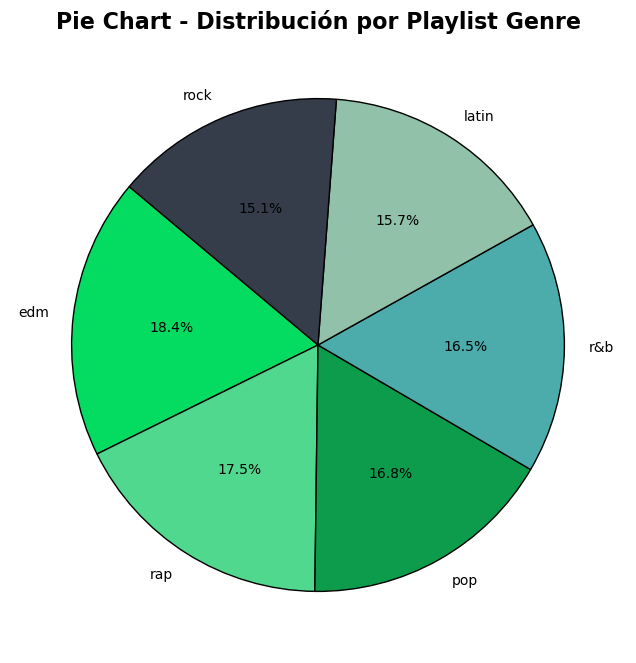

Descripción del Gráfico: El Gráfico de Pastel muestra la proporción de canciones pertenecientes a cada género de playlist. Los segmentos más grandes representan los géneros más dominantes en el dataset.


In [6]:
# Gráfico de Pastel - Distribución por playlist_genre
plt.figure(figsize=(12, 8))
genre_counts = df['playlist_genre'].value_counts()
plt.pie(genre_counts, labels=genre_counts.index, colors=palette, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Pie Chart - Distribución por Playlist Genre', fontsize=16, fontweight='bold')
plt.show()

# Descripción:
print("Descripción del Gráfico: El Gráfico de Pastel muestra la proporción de canciones pertenecientes a cada género de playlist. Los segmentos más grandes representan los géneros más dominantes en el dataset.")

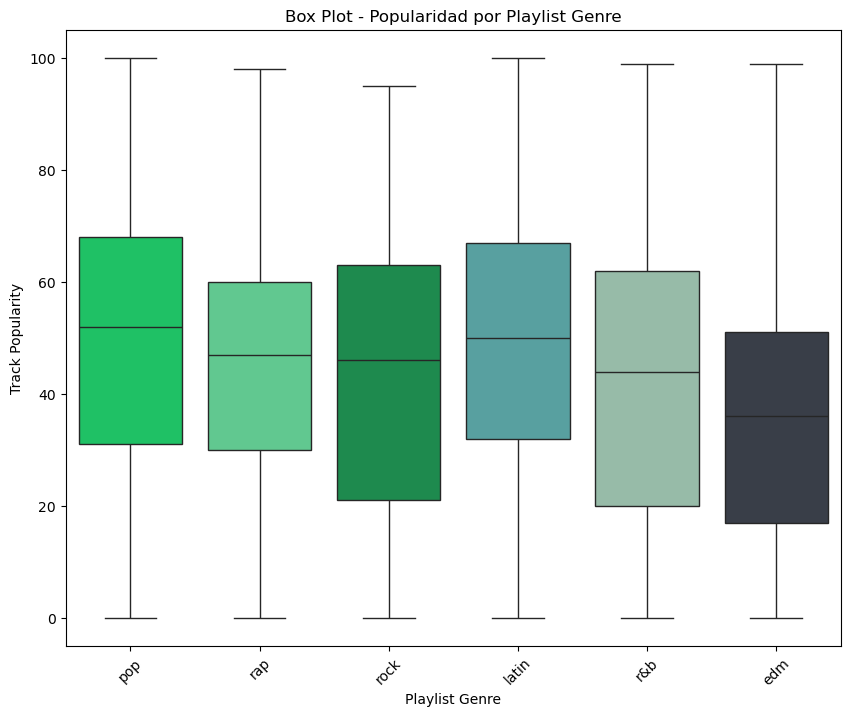

Descripción del Gráfico: El Diagrama de Caja y Bigotes muestra la distribución de la popularidad de las canciones agrupadas por género de la playlist. Cada caja representa el rango intercuartil (Q1 a Q3) de la popularidad dentro de cada género, mientras que los bigotes indican la variabilidad fuera de estos cuartiles. Los puntos que se encuentran fuera de los bigotes representan posibles valores atípicos. Este gráfico permite comparar cómo se distribuye la popularidad de las canciones en diferentes géneros de playlist, identificando géneros con mayor o menor dispersión en la popularidad.


In [7]:
# Gráfico Box Plot - Popularidad por playlist_genre
plt.figure(figsize=(10, 8))
sns.boxplot(x='playlist_genre', y='track_popularity', data=df, hue='playlist_genre', palette=palette)
plt.title('Box Plot - Popularidad por Playlist Genre')
plt.xlabel('Playlist Genre')
plt.ylabel('Track Popularity')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  # Eliminar la leyenda
plt.show()

# Descripción:
print("Descripción del Gráfico: El Diagrama de Caja y Bigotes muestra la distribución de la popularidad de las canciones agrupadas por género de la playlist. Cada caja representa el rango intercuartil (Q1 a Q3) de la popularidad dentro de cada género, mientras que los bigotes indican la variabilidad fuera de estos cuartiles. Los puntos que se encuentran fuera de los bigotes representan posibles valores atípicos. Este gráfico permite comparar cómo se distribuye la popularidad de las canciones en diferentes géneros de playlist, identificando géneros con mayor o menor dispersión en la popularidad.")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


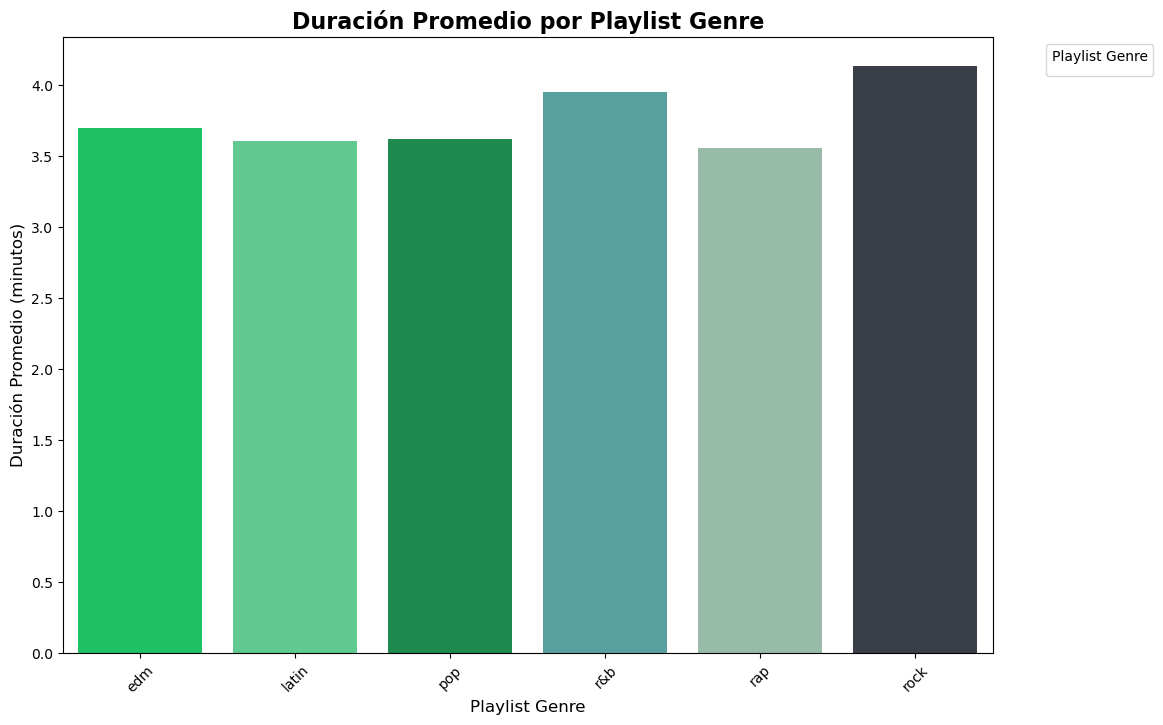

In [8]:
# Convertir 'duration_min_sec' a minutos (como número flotante)
df['duration_in_minutes'] = df['duration_min_sec'].apply(lambda x: int(x.split(':')[0]) + int(x.split(':')[1]) / 60)

# Calcular la duración promedio por playlist_genre
avg_duration = df.groupby('playlist_genre')['duration_in_minutes'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='playlist_genre', y='duration_in_minutes', data=avg_duration, hue='playlist_genre', palette=palette, dodge=False)
plt.title('Duración Promedio por Playlist Genre', fontsize=16, fontweight='bold')
plt.xlabel('Playlist Genre', fontsize=12)
plt.ylabel('Duración Promedio (minutos)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Playlist Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

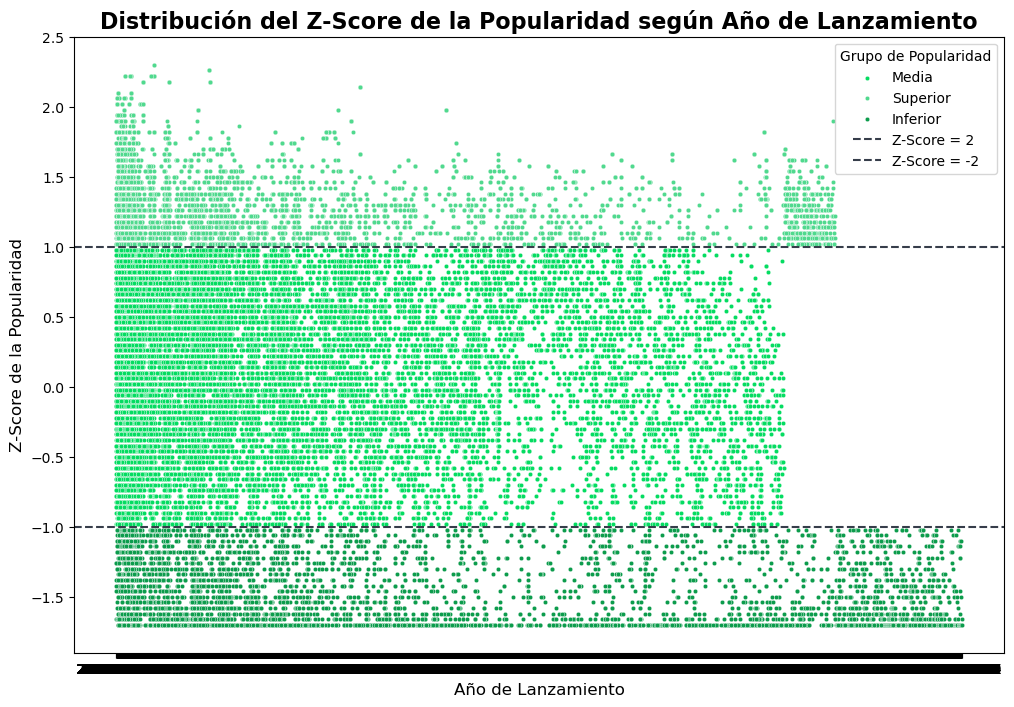

Descripción del Gráfico: Este gráfico muestra la distribución del Z-Score de la popularidad de las canciones en función de su año de lanzamiento. Los puntos verdes representan canciones cuya popularidad está dentro de la media. Los puntos en verde claro representan canciones con popularidad significativamente superior a la media (Z-Score > 1), mientras que los puntos en verde oscuro indican canciones con popularidad significativamente inferior a la media (Z-Score < -1).


In [12]:
from scipy.stats import zscore

# Asegurarse de que el DataFrame original está definido
df_cleaned = df.copy()

# Calcular Z-Score para la popularidad
df_cleaned['popularity_zscore'] = zscore(df_cleaned['track_popularity'])

# Definir los colores de la paleta para los diferentes grupos
color_in_media = '#04dc61'  # Dentro de la media
color_above = '#50d98e'     # Por encima de la media
color_below = '#0c9c4c'     # Por debajo de la media

# Asignar colores según el valor del Z-Score
df_cleaned['color'] = df_cleaned['popularity_zscore'].apply(lambda x: color_above if x > 1 
                                                            else color_below if x < -1 
                                                            else color_in_media)

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
for color, label in zip([color_in_media, color_above, color_below], ['Media', 'Superior', 'Inferior']):
    sns.scatterplot(
        x=df_cleaned[df_cleaned['color'] == color]['track_album_release_date'], 
        y=df_cleaned[df_cleaned['color'] == color]['popularity_zscore'], 
        label=label, 
        color=color, 
        s=10
    )

# Configurar el título y las etiquetas de los ejes
plt.title('Distribución del Z-Score de la Popularidad según Año de Lanzamiento', fontsize=16, fontweight='bold')
plt.xlabel('Año de Lanzamiento', fontsize=12)
plt.ylabel('Z-Score de la Popularidad', fontsize=12)
plt.axhline(1, color='#363d4a', linestyle='--', label='Z-Score = 1')
plt.axhline(-1, color='#363d4a', linestyle='--', label='Z-Score = -1')
plt.legend(title='Grupo de Popularidad')
plt.show()

# Descripción del Gráfico
print("Descripción del Gráfico: Este gráfico muestra la distribución del Z-Score de la popularidad de las canciones en función de su año de lanzamiento. Los puntos verdes representan canciones cuya popularidad está dentro de la media. Los puntos en verde claro representan canciones con popularidad significativamente superior a la media (Z-Score > 1), mientras que los puntos en verde oscuro indican canciones con popularidad significativamente inferior a la media (Z-Score < -1).")

In [ ]:
# IMPORTANTE: No supe como filtrar la columna "track_album_release_date" para que me quede solo el año, espero la devolucion.